# Diffraction limit of a telescope

Intensity of light in a telescope diffraction pattern is given by

\begin{equation}
I(r) = \left(\frac{J_1(kr)}{kr} \right)^2
\end{equation}

where r is the distance in the focal plane from the center of the diffraction pattern, $k=2\pi / \lambda$ and $J_1(x)$ is a Bessel function. The Bessels functions $J_m(x)$ are given by

\begin{equation}
J_m(x) = \frac{1}{\pi} \int_0^\pi \cos( m\theta - xsin\theta) d\theta 
\end{equation}

where m is a nonnegative integer and $x \geq 0$

## Exercise 1

Write a Python function J(m,x) that calculates the value of Jm(x) using Simpson’s
rule with N = 1000 points. Use your function in a program to make a plot, on a
single graph, of the Bessel functions J0, J1, and J2 as a function of x from x = 0 to
x = 20.

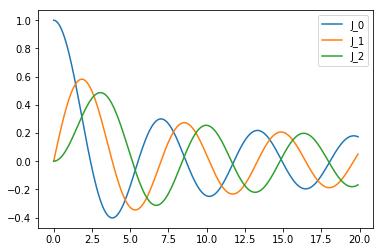

In [64]:
import pylab as pl
import numpy as np
from functools import lru_cache


def integrate(f, a, b, N=100):
    h = (b - a) / N
    result = f(a) + f(b)

    for k in range(1, N, 2):
        result += 4 * f(a + k * h)

    for k in range(2, N, 2):
        result += 2 * f(a + k * h)

    result = 1/3 * h * result

    return result

@lru_cache(maxsize=None)
def J(m, x):
    def f(theta):
        return np.cos(m * theta - x * np.sin(theta))
        
    return 1 / np.pi * integrate(f, 0, np.pi, N=1000)


x_set = np.arange(0, 20, 0.1)
for m in [0, 1, 2]:
    J_set = []
    for x in x_set:
        J_set.append(J(m, x))
        
    pl.plot(x_set, J_set, label="J_{0}".format(m))

pl.legend()

## Exercise 2
Make a second program that makes a density plot of the intensity of the circular
diffraction pattern of a point light source with λ = 500 nm, in a square region of
the focal plane, using the formula given above. Your picture should cover values
of r from zero up to about 1 µm.

/home/jens/.virtualenvs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


CacheInfo(hits=228953, misses=21047, maxsize=None, currsize=21047)


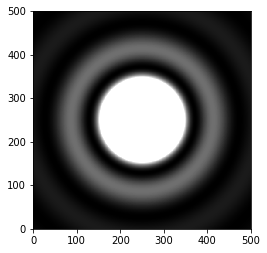

In [78]:
import numpy as np
from functools import lru_cache

@lru_cache(maxsize=None)
def I(k, r):
    return (J(1, k * r) / (k * r)) ** 2

wavelength = 200.0
k = 2 * np.pi / wavelength
points = 500
xi = np.empty([points, points], float)
for p1 in range(points):
    for p2 in range(points):
        x = p1 - points / 2 
        y = p2 - points / 2
        r = np.sqrt(x**2 + y**2)
        xi[p1, p2] = I(k, r)

print(I.cache_info())
pl.imshow(xi, origin="lower", vmax=0.01)
pl.gray()